# Logistic Regression

In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score,accuracy_score,auc,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

In [86]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,class_sep=0.25,
                           n_clusters_per_class=1)

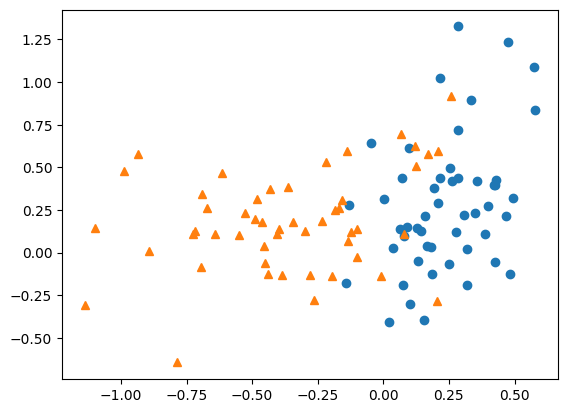

In [87]:
plt.plot(X[y==0,0],X[y==0,1],'o')
plt.plot(X[y==1,0],X[y==1,1],'^')


In [91]:
#function to give prediction, scores
def pred(X,y):
    #data split
    train_x, test_x, train_y, test_y = split(X,y,test_size=0.3, shuffle = True , random_state = 1)
    #model
    model = LogisticRegression()
    model.fit(train_x,train_y)
    class_pred = model.predict(test_x)
    #scores
    print('Precision :',precision_score(test_y,class_pred))
    print('Accuracy :',accuracy_score(test_y,class_pred))
    print('Confusion Matrix : ',confusion_matrix(test_y,class_pred))
    return class_pred


In [92]:
#prediction and scores
y_hat = pred(X,y)

Precision : 0.9285714285714286
Accuracy : 0.8666666666666667
Confusion Matrix :  [[13  1]
 [ 3 13]]


In [98]:
#Classification on non-linearly seperable data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.3)

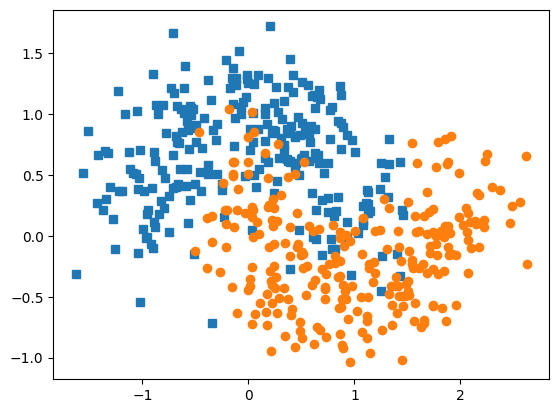

In [99]:
plt.plot(X[y==0,0],X[y==0,1],'s')
plt.plot(X[y==1,0],X[y==1,1],'o')


In [100]:
y_hat = pred(X,y)

Precision : 0.8648648648648649
Accuracy : 0.8866666666666667
Confusion Matrix :  [[69 10]
 [ 7 64]]


### Smart City Data: Occupancy Detection based on IoT Sensors

Now we will try out logistic regression on a subset of a smart city data. We will be using the Occupancy Detection Data Set from UCI Machine Learning Repository. This is a binary classification problem which requires that an observation of environmental factors such as temperature and humidity be used to classify whether a room is occupied or unoccupied.

Data is provided with date-time information and six environmental measures taken each minute over multiple days, specifically:

- Data (Timestamp)
- Temperature in Celsius.
- Relative humidity as a percentage.
- Light measured in lux.
- Carbon dioxide measured in parts per million.
- Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
- Occupancy as either 1 for occupied or 0 for not occupied.

We won't be using time-stamp as a feature in this problem.

In [104]:
data = pd.read_csv('X:\GIt\CP 318 Worksheet Practise\Data\occupancy_detection.txt')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [105]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [175]:
data.isnull().values.any()
n = data.shape[0] #no of samples

#features
data_new = data.loc[:,['Light','CO2','Occupancy']]

In [176]:
#creating data for input
X= data_new.values[:, :2]
y= data_new.values[:, -1].astype('int')

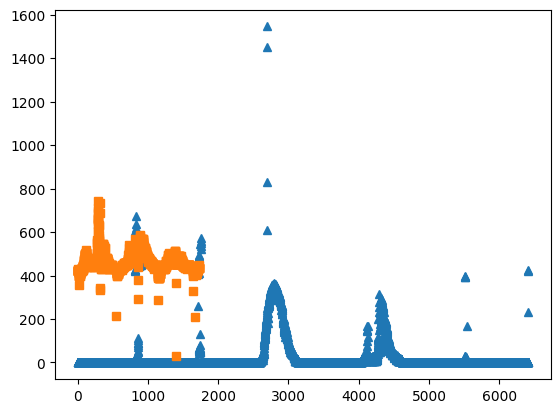

In [179]:
xaxis = range(X[y==0].shape[0])
xaxis2 = range(X[y==1].shape[0])

plt.plot(xaxis, X[y==0,0], '^')
plt.plot(xaxis2,X[y==1,0], 's')

In [180]:
y_pred = pred(X,y)

Precision : 0.9611829944547134
Accuracy : 0.9893573475235367
Confusion Matrix :  [[1897   21]
 [   5  520]]
